In [1]:
import sys
assert sys.version_info >= (3, 5)

In [5]:
import sklearn
assert sklearn.__version__ >= "0.2"

A function to merge OECD's life satisfaction data and IMF'S GDP per capita data.

In [26]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values = 'Value')
    gdp_per_capita.rename(columns = {'2015': 'GDP per capita'}, inplace = True)
    gdp_per_capita.set_index('Country', inplace = True)
    full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita,
                                 left_index = True, right_index = True)
    full_country_stats.sort_values(by = 'GDP per capita', inplace = True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [22]:
import os
data_path = os.path.join('datasets', 'lifesat', '')

In [8]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [11]:
# Download Data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(data_path, exist_ok=True)
for filename in ('oecd_bli_2015.csv', 'gdp_per_capita.csv'):
    print('Downloading', filename)
    url = DOWNLOAD_ROOT + 'datasets/lifesat/' + filename
    urllib.request.urlretrieve(url, data_path + filename)

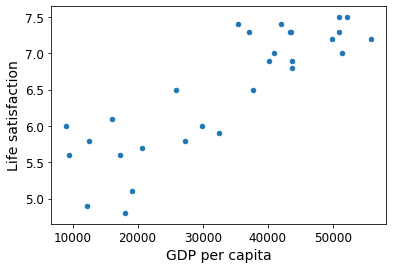

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv", thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
Y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.show()

In [35]:
country_stats.loc['Austria']

GDP per capita       43724.031
Life satisfaction        6.900
Name: Austria, dtype: float64

In [39]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, Y)

# Make prediciton of Austria
X_new = [[43724.031]]
predictions = model.predict(X)

In [40]:
from sklearn.metrics import mean_squared_error

linear_mse = mean_squared_error(predictions, Y)
linear_rmse = np.square(linear_mse)
linear_rmse

0.032670684346707654